In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv') 
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,12/1/2010 8:26,NaN,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,NaN,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535868 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535869 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


видно, что данные имеют пропуски в таких столбцах как:StockCode, Description, Quantity, UnitPrice, CustomerID, Country
i.	Устранение пропусков в данных;

In [3]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

вижу, что столбцы имеют корректные названия
подсчитаю суммарное количество пропусков

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6041
InvoiceDate      6035
UnitPrice        6040
CustomerID     138727
Country          6035
dtype: int64

StockCode не несет информационной нагрузки для работы с данными => его можно удалить
Description заполним значением 'non description'
Quantity заполним медианным значением
InvoiceDate: удалим строки, содержащие пропуски
UnitPrice заполним медианным значением
CustomerID не несет информационной нагрузки для работы с данными => его можно удалить
Country заполним значением 'not specified'

In [5]:
df = df.drop('StockCode', axis = 1)
df = df.drop('CustomerID', axis = 1)

In [6]:
df['Description'] = df['Description'].fillna('non description')
df['Country'] = df['Country'].fillna('not specified')
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Description  541909 non-null  object 
 2   Quantity     541909 non-null  float64
 3   InvoiceDate  535874 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), object(4)
memory usage: 24.8+ MB


In [7]:
df = df.dropna(axis=0, how='any')

In [8]:
df.isnull().sum()

InvoiceNo      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [9]:
df.duplicated().sum()

5223

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.duplicated().sum()

0

Пропуски в данных успешно устранены, дубликаты данных также устранены

ii.	Кодирование категориальных признаков;
использую кодирование категорий целочисленными значениями

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(df['Country'])

In [15]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [16]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [17]:
le.inverse_transform([0, 1, 2, 3])

array(['Australia', 'Austria', 'Bahrain', 'Belgium'], dtype=object)

iii.	Нормализация числовых признаков

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

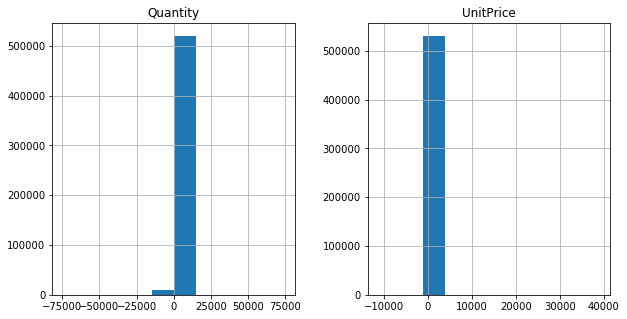

In [26]:
df.hist(figsize=(10,5))
plt.show()

Исходное распределение
отличается от нормального

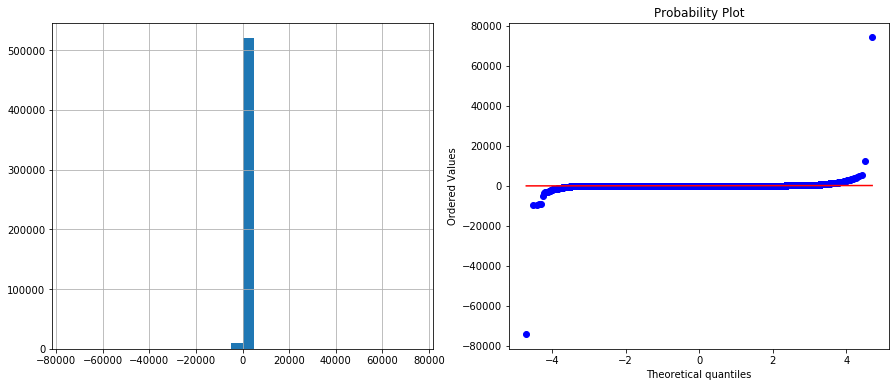

In [36]:
diagnostic_plots(df, 'Quantity')

Квадратный корень

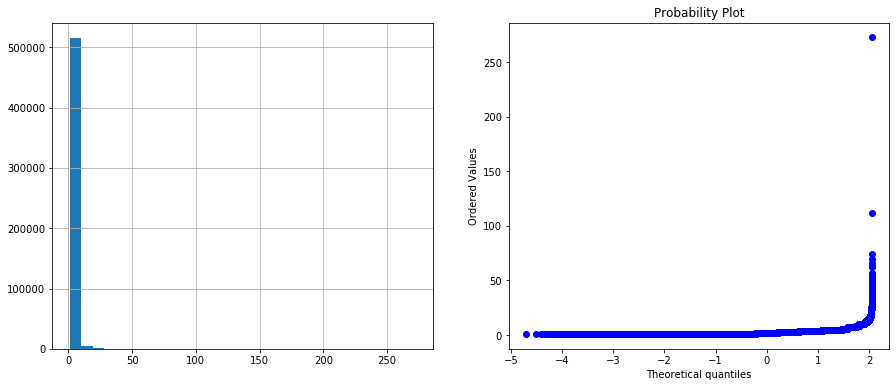

In [37]:
df['Quantity_sqr'] = df['Quantity']**(1/2) 
diagnostic_plots(df, 'Quantity_sqr')

Возведение в степень

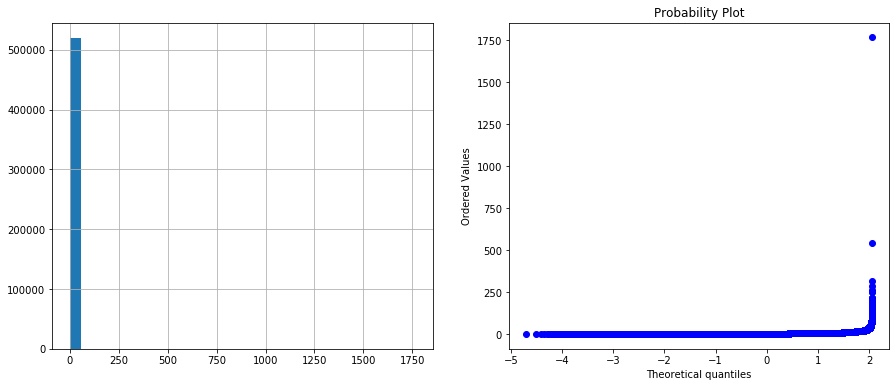

In [38]:
df['Quantity_exp1'] = df['Quantity']**(1/1.5)
diagnostic_plots(df, 'Quantity_exp1')

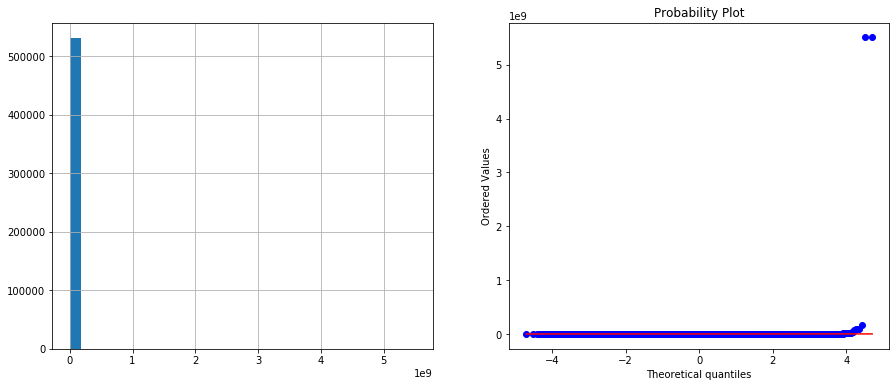

In [39]:
df['Quantity_exp2'] = df['Quantity']**(2)
diagnostic_plots(df, 'Quantity_exp2')

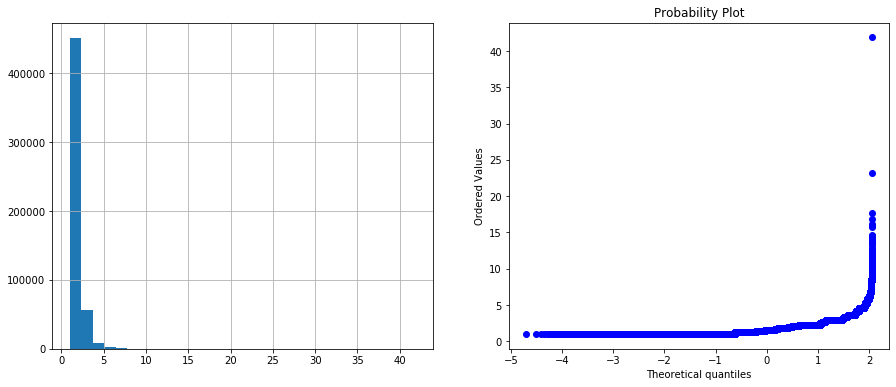

In [40]:
df['Quantity_exp3'] = df['Quantity']**(0.333)
diagnostic_plots(df, 'Quantity_exp3')

Преобразование Йео-Джонсона


Оптимальное значение λ = 1.0078093807590327


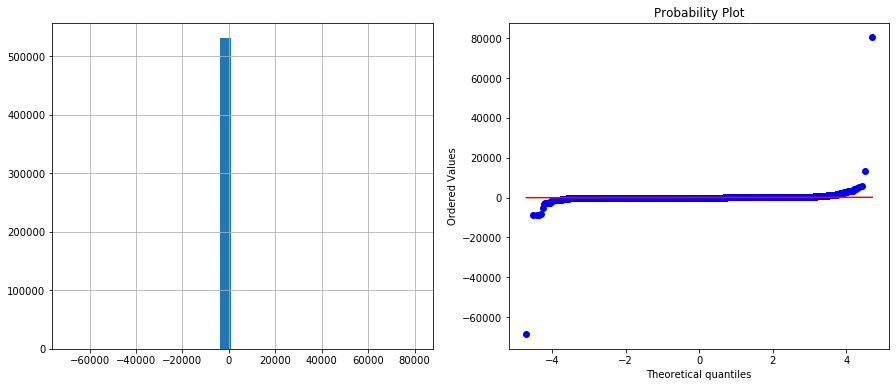

In [42]:
# Необходимо преобразовать данные к действительному типу
df['Quantity'] = df['Quantity'].astype('float')
df['Quantity_yeojohnson'], param = stats.yeojohnson(df['Quantity']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'Quantity_yeojohnson')